**Image Processing Project Image Processing and Computer Vision Techniques used in Autonomous Vehicles - Part 2**

In [1]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog 

In [2]:
import glob
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')

In [3]:
len(car)

8792

In [4]:
len(no_car)

8968

### HOG 

**Sample HOG**

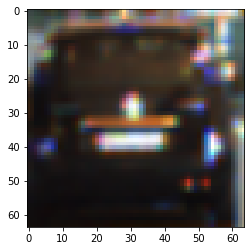

In [5]:
image_color = cv2.imread(car[6905]) 
plt.imshow(image_color)

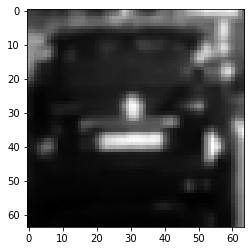

In [6]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

In [7]:
features, hog_image = hog(image_gray, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = True)
features.shape 

(396,)

In [8]:
hog_image.shape

(64, 64)

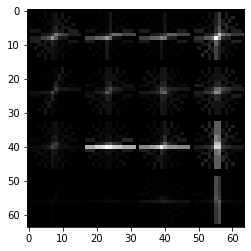

In [9]:
plt.imshow(hog_image, cmap = 'gray')

#### **HOG Feature Extraction and Creating Train Data**

In [10]:
car_hog_accum = []
for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    car_hog_feature, car_hog_img = hog(image_color[:,:,0], orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = True)           
    car_hog_accum.append(car_hog_feature)

In [11]:
X_car = np.vstack(car_hog_accum).astype(np.float64)  
y_car = np.ones(len(X_car))

In [12]:
X_car.shape

(8792, 396)

In [13]:
y_car.shape

(8792,)

In [14]:
y_car

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = True)
    nocar_hog_accum.append(nocar_hog_feature)

In [16]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)  
y_nocar = np.zeros(len(X_nocar))

In [17]:
X_nocar.shape

(8968, 396)

In [18]:
y_nocar.shape

(8968,)

In [19]:
X = np.vstack((X_car, X_nocar))
X.shape

(17760, 396)

In [37]:
y = np.hstack((y_car, y_nocar))
y.shape

(17760,)

## Vehicle Detection

**SVM**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

LinearSVC()

<AxesSubplot:>

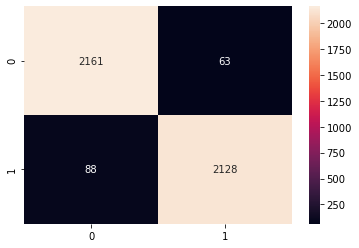

In [23]:
y_predict = svc_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2224
         1.0       0.97      0.96      0.97      2216

    accuracy                           0.97      4440
   macro avg       0.97      0.97      0.97      4440
weighted avg       0.97      0.97      0.97      4440



In [25]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [26]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [27]:
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1], 'kernel': ['rbf']} 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=  19.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=  18.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=  18.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=  18.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=  19.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=  12.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=  12.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=  13.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.959 total time=  12.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.968 total time=  12.2s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.985 total time=  13.8s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

SVC(C=10, gamma=1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2224
         1.0       0.99      0.99      0.99      2216

    accuracy                           0.99      4440
   macro avg       0.99      0.99      0.99      4440
weighted avg       0.99      0.99      0.99      4440



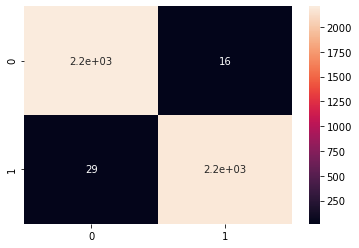

In [28]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

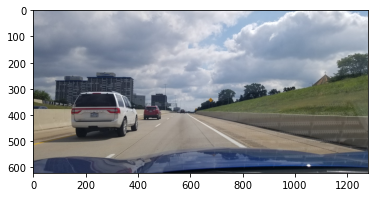

In [29]:
test_image = mpimg.imread('vehicle.jpg')
plt.imshow(test_image)
test_image = test_image.astype(np.float32)/255

(200, 800, 3)

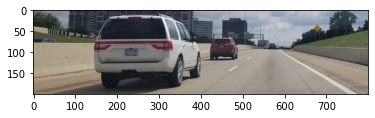

In [30]:
h_start = 300
h_stop = 500
pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 
masked_region = test_image[h_start:h_stop,:800,:]
#masked_region = test_image[h_start:h_stop,300:800,:]
#masked_region = test_image[h_start:h_stop,650:,:]
plt.imshow(masked_region)
masked_region.shape

In [31]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(100, 400, 3)


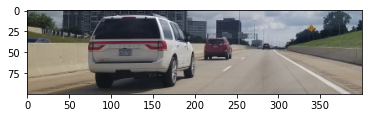

In [32]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]
print(masked_region_resized.shape)
plt.imshow(masked_region_resized)

In [33]:
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False)

(100, 400)


In [34]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1
blocks_in_window = (64 // pixels_in_cell)-1     
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step
rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)


In [35]:
rectangles_found

[((192, 300), (320, 428)), ((384, 300), (512, 428))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


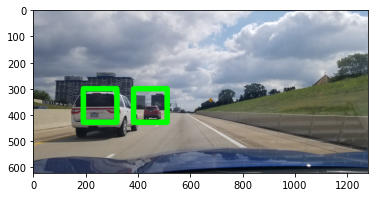

In [36]:
Image_with_Rectangles_Drawn = np.copy(test_image)
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 20)
    
plt.imshow(Image_with_Rectangles_Drawn)